In [1]:
# https://www.data.go.kr/data/3035522/fileData.do
# https://www.data.go.kr/data/15061057/fileData.do

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [6]:
df_last = pd.read_csv('./sample/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


In [8]:
df_first = pd.read_csv('./sample/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [9]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [10]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [12]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [14]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

In [16]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3

In [17]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7


In [19]:
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [20]:
df_last['규모구분'].str.contains('전체') # 문자열에 '전체'가 들어있으면 True

0        True
1       False
2       False
3       False
4       False
        ...  
4330     True
4331    False
4332    False
4333    False
4334    False
Name: 규모구분, Length: 4335, dtype: bool

In [22]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적', '')

In [23]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡이하
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡초과 85㎡이하
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡초과 102㎡이하
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡초과


In [24]:
# 초과, 이하, 공백문자 제거 라는 텍스트 제거
df_last['전용면적'] = df_last['전용면적'].str.replace('초과', '')
df_last['전용면적'] = df_last['전용면적'].str.replace('이하', '')
df_last['전용면적'] = df_last['전용면적'].str.replace(' ', '')
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡102㎡
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡


In [26]:
# 규모구분, 분양가격 칼럼 삭제
df_last.drop(['규모구분', '분양가격(㎡)'], axis=1, inplace=True)

In [27]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡85㎡
3,서울,2015,10,18879.3,85㎡102㎡
4,서울,2015,10,19400.7,102㎡


In [29]:
# 지역별 평균 분양가격
df_last.groupby('지역명')['평당분양가격'].mean()

지역명
강원     7890.750000
경기    13356.895200
경남     9268.778138
경북     8376.536515
광주     9951.535821
대구    11980.895455
대전    10253.333333
부산    12087.121200
서울    23599.976400
세종     9796.516456
울산    10014.902013
인천    11915.320732
전남     7565.316532
전북     7724.235484
제주    11241.276712
충남     8233.651883
충북     7634.655600
Name: 평당분양가격, dtype: float64

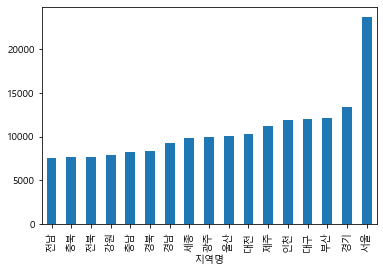

In [31]:
df_last.groupby('지역명')['평당분양가격'].mean().sort_values().plot(kind='bar')

In [32]:
# 전용면적당 분양가격
df_last.groupby('전용면적')['평당분양가격'].mean()

전용면적
102㎡       11517.705634
60㎡        10375.137421
60㎡85㎡     10271.040071
85㎡102㎡    11097.599573
전체         10276.086207
Name: 평당분양가격, dtype: float64

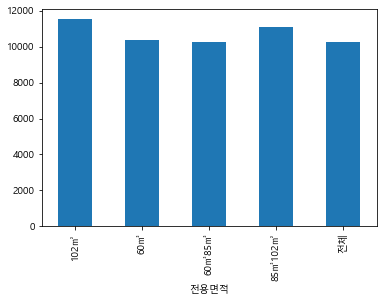

In [33]:
df_last.groupby('전용면적')['평당분양가격'].mean().plot(kind='bar')

In [34]:
# 지역과 전용면적 두 기준으로 데이터를 묶는다.
df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean()

지역명  전용면적   
강원   102㎡       8311.380000
     60㎡        7567.098000
     60㎡85㎡     7485.588000
     85㎡102㎡    8749.557143
     전체         7477.536000
                   ...     
충북   102㎡       8195.352000
     60㎡        7103.118000
     60㎡85㎡     7264.488000
     85㎡102㎡    8391.306000
     전체         7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [35]:
df_last.groupby(['전용면적', '지역명'])['평당분양가격'].mean()

전용면적  지역명
102㎡  강원      8311.380000
      경기     14771.790000
      경남     10358.363265
      경북      9157.302000
      광주     11041.532432
                 ...     
전체    전남      7283.562000
      전북      7292.604000
      제주     10784.994000
      충남      7815.324000
      충북      7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

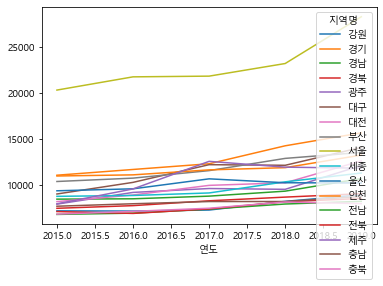

In [42]:
# 지역별 연도에 따른 평당분양가격의 변화를 line chart로 나타내시오
df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().plot(kind='line')

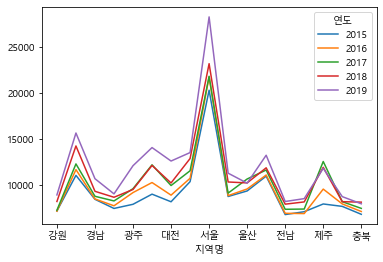

In [39]:
df_last.groupby(['지역명', '연도'])['평당분양가격'].mean().unstack().plot(kind='line')

In [44]:
# pivot_table을 활용
p = pd.pivot_table(df_last, index=['연도', '지역명'], values='평당분양가격')
p

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2019 전남    8219.275862
     전북    8532.260000
     제주   11828.469231
     충남    8748.840000
     충북    7970.875000

[85 rows x 1 columns]

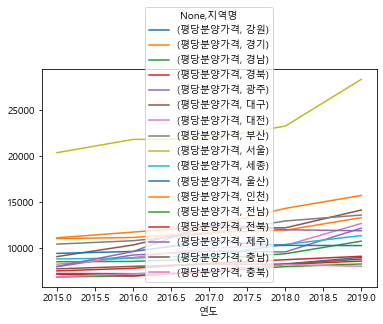

In [47]:
p.unstack().plot(kind='line')

In [48]:
# boxplot - 데이터의 분포를 파악

In [50]:
p = df_last.pivot_table(index='월', columns='연도', values='평당분양가격')
p

연도,2015,2016,2017,2018,2019
월,,,,,
1,NaN,9334.029630,10095.132143,10719.148000,11535.540789
2,NaN,9361.440000,10110.885714,10766.668000,11574.793421
3,NaN,9423.276923,10107.428571,10905.488000,11610.094737
4,NaN,9601.993902,10217.232143,10920.728571,11777.876000
5,NaN,9602.396341,10358.819277,11087.485714,11976.394737
6,NaN,9676.042683,10431.618072,10921.928571,12401.884000
7,NaN,9700.551220,10549.536585,10868.376316,12424.852000
8,NaN,9719.023171,10564.869512,10811.147368,12523.896000
9,NaN,9737.656098,10583.601266,10915.257692,12527.571429


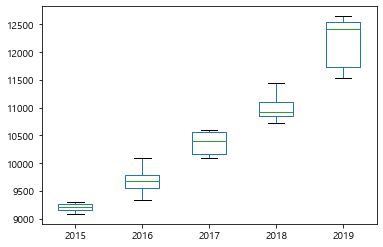

In [51]:
p.plot(kind='box')

In [53]:
p=df_last.pivot_table(index='월', columns=['연도', '전용면적'], values='평당분양가격')
p

연도       2015                                                            2016  \
전용면적     102㎡         60㎡       60㎡85㎡     85㎡102㎡           전체          102㎡   
월                                                                               
1         NaN         NaN          NaN         NaN          NaN   9915.840000   
2         NaN         NaN          NaN         NaN          NaN   9861.060000   
3         NaN         NaN          NaN         NaN          NaN   9952.092857   
4         NaN         NaN          NaN         NaN          NaN  10282.181250   
5         NaN         NaN          NaN         NaN          NaN  10177.200000   
6         NaN         NaN          NaN         NaN          NaN  10181.118750   
7         NaN         NaN          NaN         NaN          NaN  10225.050000   
8         NaN         NaN          NaN         NaN          NaN  10355.193750   
9         NaN         NaN          NaN         NaN          NaN  10361.175000   
10    9631.82  8794.91250  8831.964706  9416.96250  8823.229412  10791.582353   
11    9932.78  8903.60625  8875.641176  9586.50000  8879.329412  11061.405882   
12    9947.08  9156.05625  8967.847059  9552.05625  8976.582353  11261.929412   

연도                                                         ...          2018  \
전용면적          60㎡       60㎡85㎡       85㎡102㎡           전체  ...          102㎡   
월                                                          ...                 
1     9195.243750  9035.205882   9554.118750  9042.970588  ...  11220.220000   
2     9228.243750  9033.070588   9725.980000  9052.676471  ...  11243.100000   
3     9218.756250  9059.276471  10006.778571  9063.741176  ...  11320.320000   
4     9260.382353  9173.805882  10230.000000  9177.494118  ...  11125.840000   
5     9343.270588  9210.105882  10161.800000  9219.229412  ...  11536.800000   
6     9302.117647  9340.164706  10349.900000  9315.900000  ...  11101.907143   
7     9310.076471  9368.311765  10377.400000  9332.400000  ...  11079.750000   
8     9290.664706  9380.152941  10315.800000  9360.935294  ...  10994.185714   
9     9449.841176  9338.417647  10295.560000  9345.600000  ...  11529.540000   
10    9651.529412  9554.664706  10082.664706  9540.688235  ...  11827.860000   
11    9673.852941  9498.952941  10147.912500  9491.964706  ...  12028.940000   
12    9829.923529  9559.711765  10245.881250  9572.911765  ...  12261.040000   

연도                                                                  2019  \
전용면적          60㎡        60㎡85㎡       85㎡102㎡            전체         102㎡   
월                                                                          
1     10839.40000  10160.505882  11286.000000  10362.776471  12322.64000   
2     10852.16000  10281.052941  11292.600000  10416.158824  12398.32000   
3     10970.74000  10430.717647  11505.600000  10568.347059  12491.38000   
4     11002.20000  10496.523529  11575.575000  10625.029412  12980.22000   
5     11027.98125  10641.141176  11727.100000  10741.888235  13371.80625   
6     11038.50000  10618.429412  11340.069231  10647.741176  13674.32000   
7     10628.20000  10617.264706  11624.376923  10579.217647  13533.91875   
8     10609.94000  10604.841176  11440.592308  10562.911765  13702.01250   
9     10539.54000  10813.905882  10983.814286  10749.652941  13854.01875   
10    10679.02000  10921.447059  11488.950000  10840.111765  13801.01250   
11    10827.91875  10986.476471  11495.078571  10904.364706  13873.40625   
12    11082.72000  11271.562500  11554.714286  11138.943750  13832.06000   

연도                                                            
전용면적           60㎡        60㎡85㎡       85㎡102㎡            전체  
월                                                             
1     11130.900000  11375.100000  11640.514286  11245.575000  
2     11190.520000  11394.075000  11667.150000  11262.900000  
3     11161.920000  11456.156250  11644.050000  11328.281250  
4     11243.807143  11505.037500  11777.464286  11391.187500  
5

<Figure size 3600x2160 with 0 Axes>

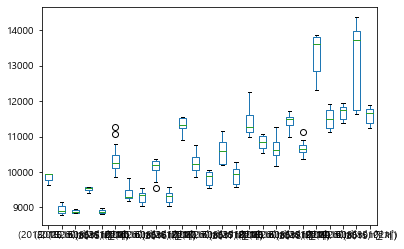

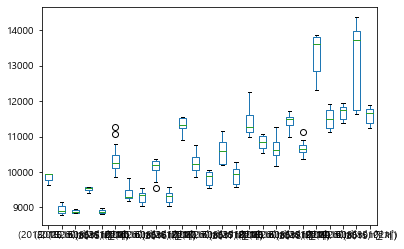

In [68]:
plt.figure(figsize=(50,30))
p.plot(kind='box')

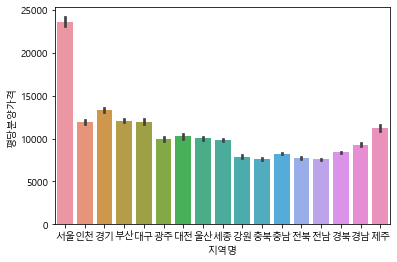

In [75]:
sns.barplot(data=df_last, x='지역명', y='평당분양가격')

In [74]:
df_2019 = df_last[df_last['연도']==2019]

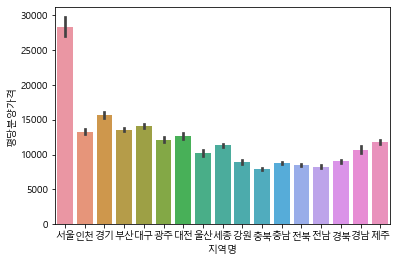

In [76]:
sns.barplot(data=df_2019, x='지역명', y='평당분양가격')

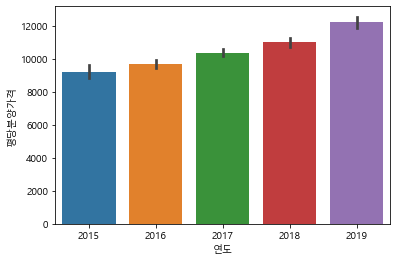

In [78]:
#연도별 평균 분양가
sns.barplot(data=df_last, x='연도', y='평당분양가격')

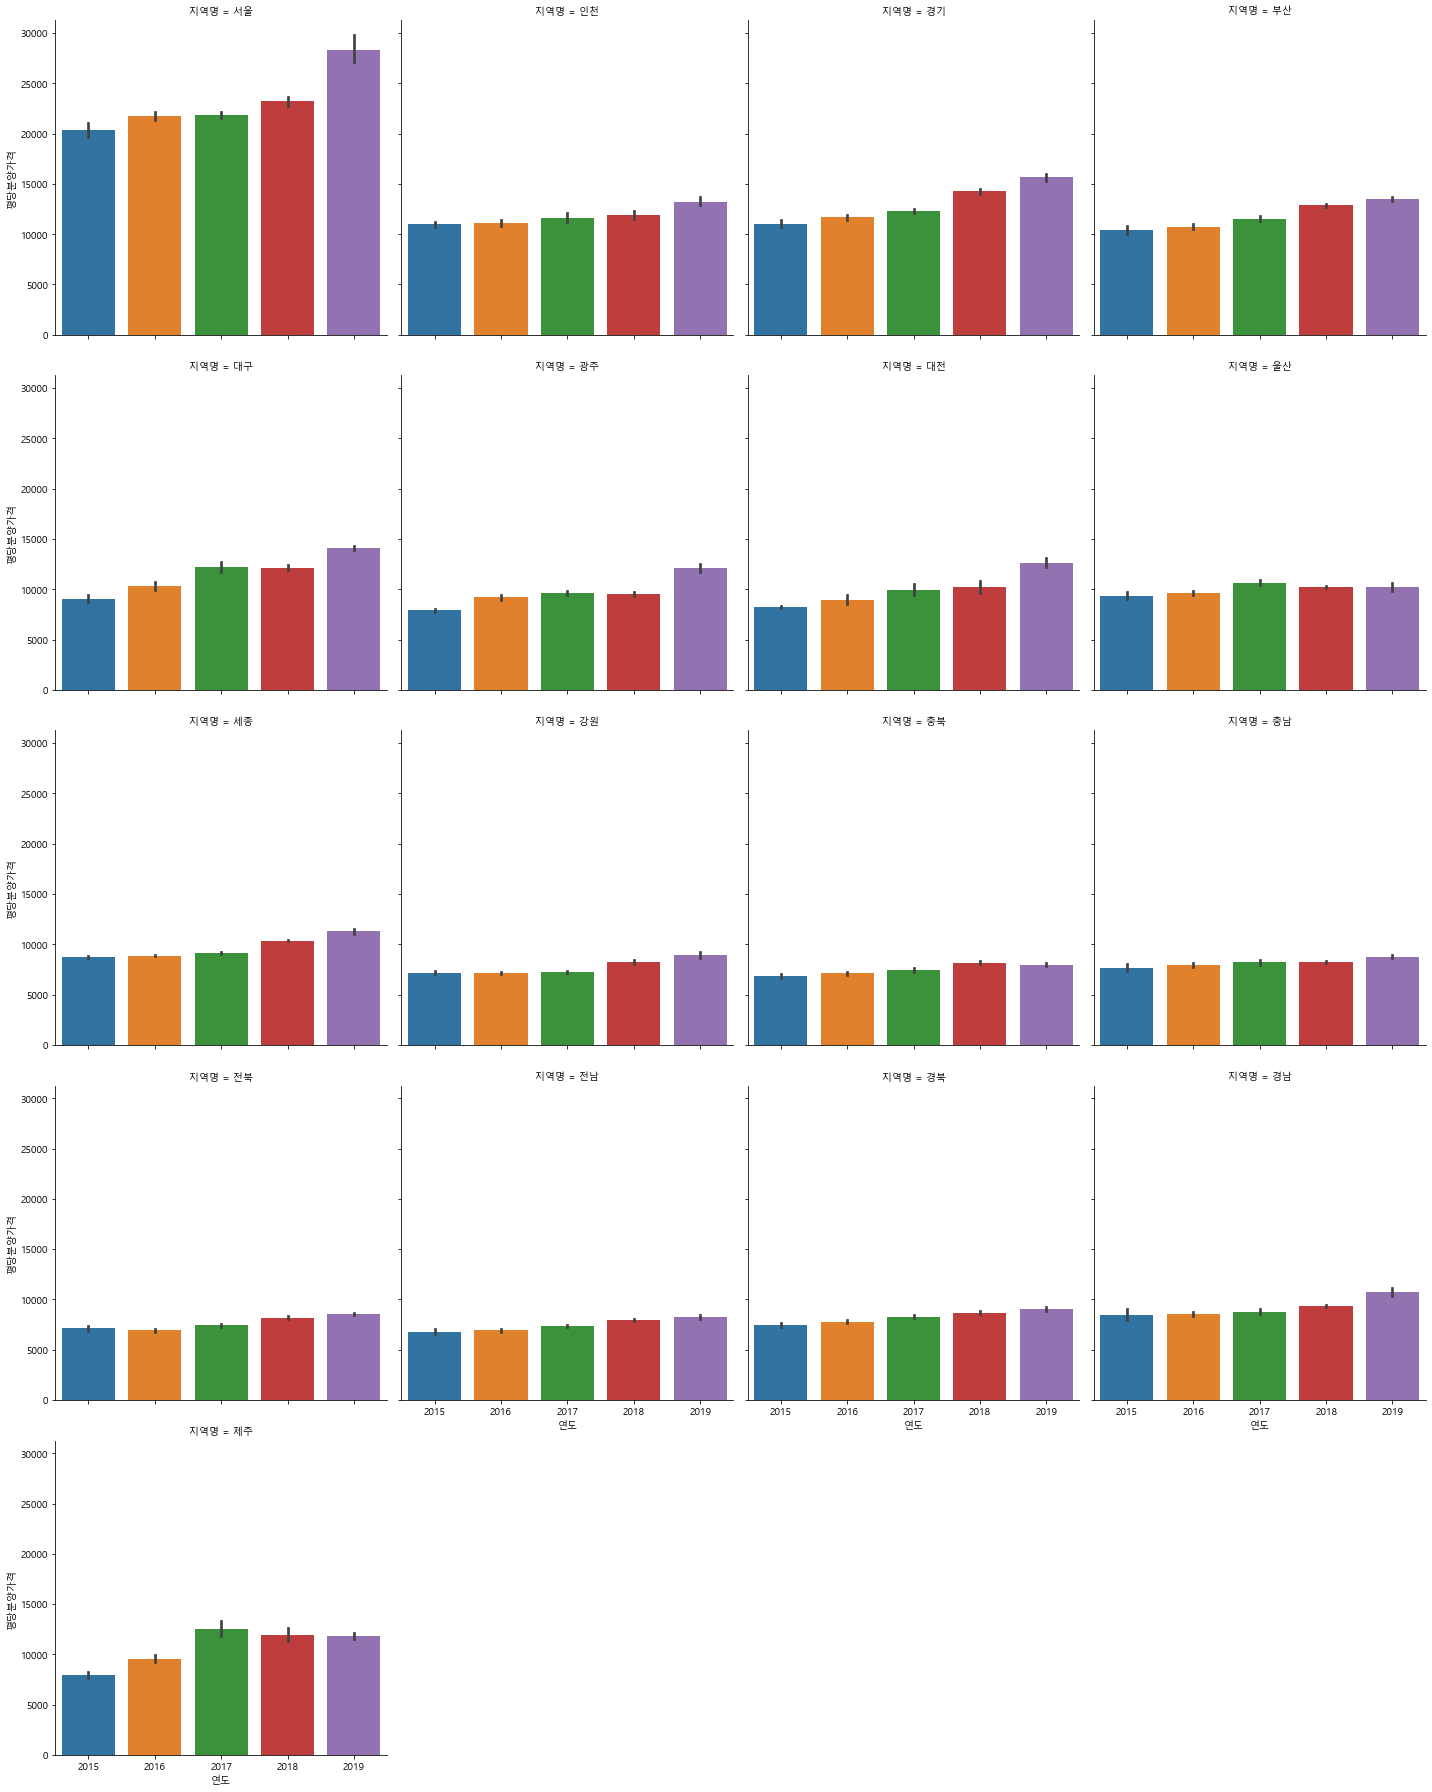

In [81]:
sns.catplot(data=df_last, x='연도', y='평당분양가격', kind='bar', col='지역명', col_wrap=4)

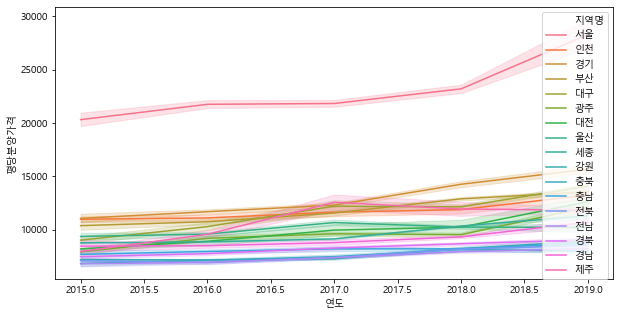

In [82]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df_last, x='연도', y='평당분양가격', hue='지역명')

<Figure size 720x360 with 0 Axes>

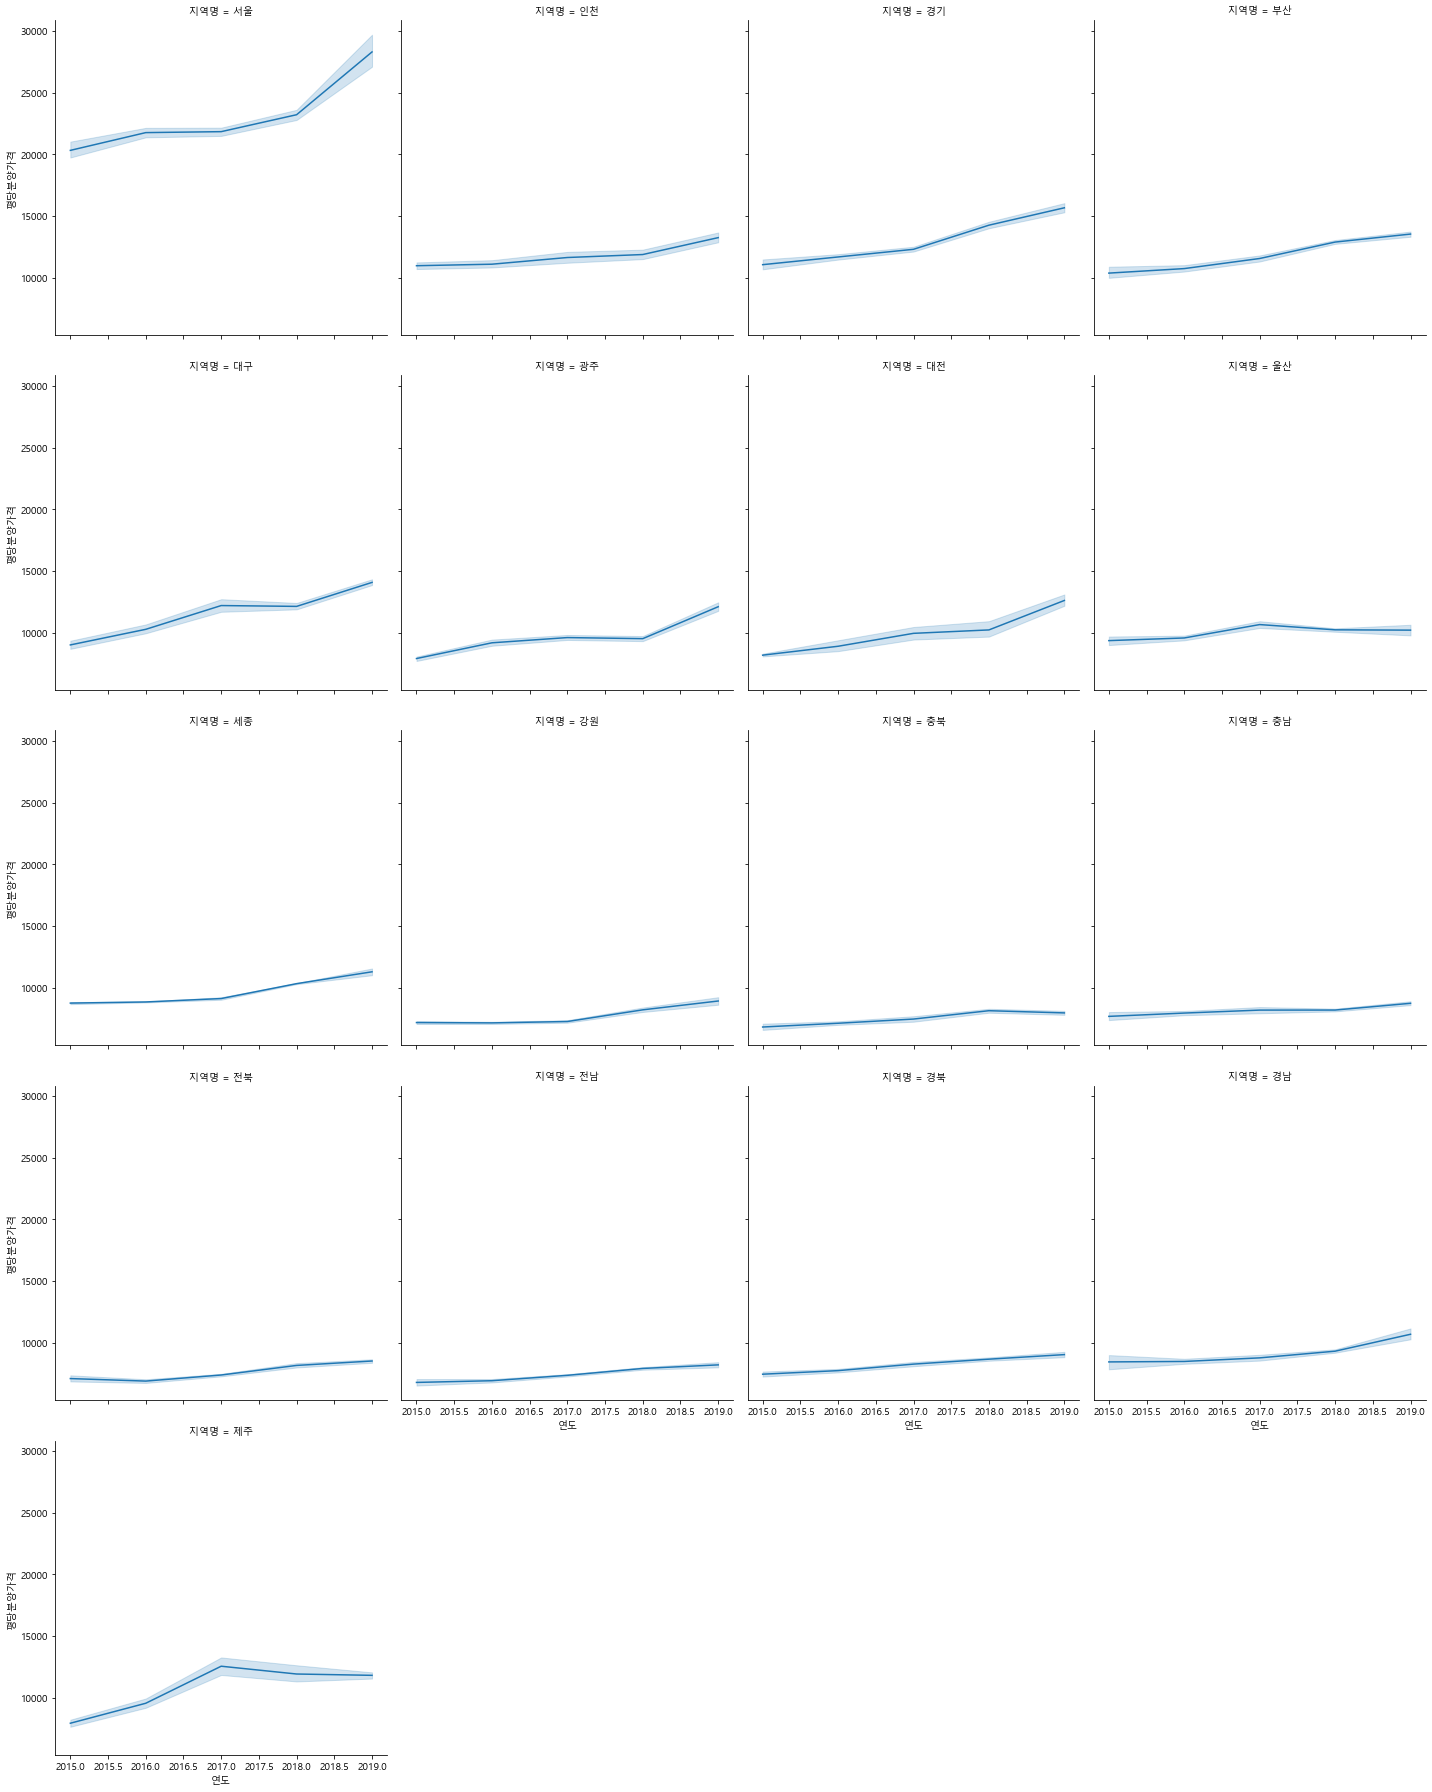

In [84]:
plt.figure(figsize=(10,5))
sns.relplot(data=df_last, x='연도', y='평당분양가격', col='지역명', col_wrap=4, kind='line')

In [85]:
# 2015년 8월 이전 데이터 보기
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [86]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [88]:
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [89]:
# df_first와 유사한 형태로 df를 변형 - melt

In [92]:
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [93]:
#id_var는 특정 칼럼을 남기고 나머지는 모두 하나의 칼럼의 행 값으로 바꾼다.
df_first_melt = df_first.melt(id_vars='지역', var_name='기간', value_name='평당분양가격')
df_first_melt.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [94]:
df_last.head(1)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체


In [96]:
df_first_melt.columns = ['지역명', '기간', '평당분양가격']
df_first_melt.head(2)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111


In [97]:
# df_first_melt'기간' 칼럼값을 '연도', '월'로 칼럼을 나눈다.

In [109]:
df_first_melt['기간'][0].split('년')[0]

'2013'

In [111]:
df_first_melt['기간'][0].split('년')[1][:-1]

'12'

In [114]:
df_first_melt['기간'].apply(lambda x: int(x.split('년')[0]))
df_first_melt['기간'].apply(lambda x: int(x.split('년')[1][:-1]))

0      12
1      12
2      12
3      12
4      12
       ..
352     8
353     8
354     8
355     8
356     8
Name: 기간, Length: 357, dtype: object

In [115]:
df_first_melt['연도'] = df_first_melt['기간'].apply(lambda x: int(x.split('년')[0]))
df_first_melt['월'] = df_first_melt['기간'].apply(lambda x: int(x.split('년')[1][:-1]))

In [116]:
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [117]:
# df_first_melt, df_last를 concat으로 병합
# 1. df_first_melt - 기간 칼럼을 삭제
# 2. df_last 전용면적 전체만 남기고 전용면적 칼럼 삭제
# 3. df로 병합

In [140]:
df_first_melt.drop('기간', axis=1, inplace=True)

In [141]:
df_last = df_last[df_last['전용면적']=='전체'].copy()
df_last.drop('전용면적', axis=1, inplace=True)

In [143]:
df = pd.concat([df_last, df_first_melt])

In [144]:
# 연도별 데이터의 갯수

In [145]:
df.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [146]:
df.groupby('연도')['월'].count()

연도
2013     17
2014    204
2015    187
2016    204
2017    204
2018    204
2019    204
Name: 월, dtype: int64

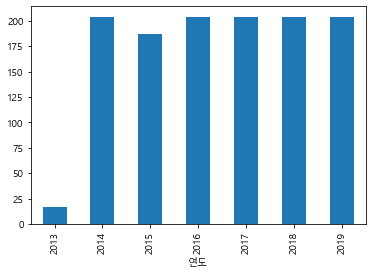

In [147]:
df.groupby('연도')['월'].count().plot(kind='bar')

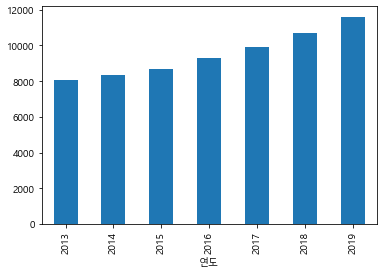

In [148]:
# 연도별 평균 분양금액
df.groupby('연도')['평당분양가격'].mean().plot(kind='bar')

In [149]:
# 지역별로 연간 분양평균가격의 변화추세를 table과 챠트로 표시

In [150]:
df.head()

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6


In [157]:
t = df.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack()
t

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.00,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.25,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.60,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.50,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7126.800000,11850.000000,8119.800000,7794.900000,9463.500000,11455.800000,9044.700000,11577.900000,21375.90,9135.300000,11345.100000,10736.700000,7187.700000,7057.800000,10830.900000,7456.200000,6762.600000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.35,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.05,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000


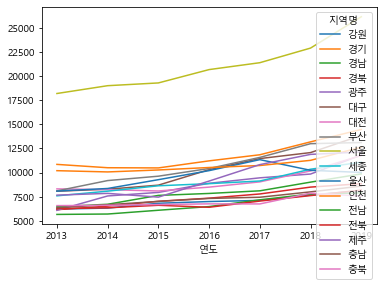

In [156]:
df.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().plot()

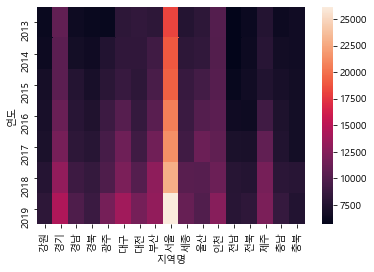

In [159]:
sns.heatmap(t)

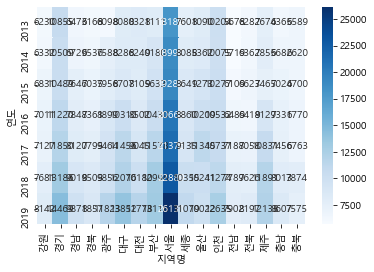

In [160]:
sns.heatmap(t, cmap='Blues', annot=True, fmt='.0f')

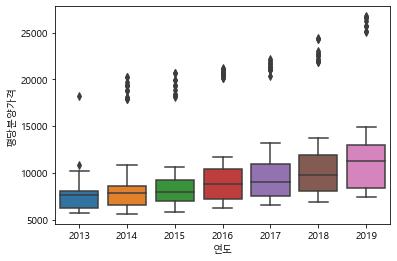

In [161]:
sns.boxplot(data=df, x='연도', y='평당분양가격')

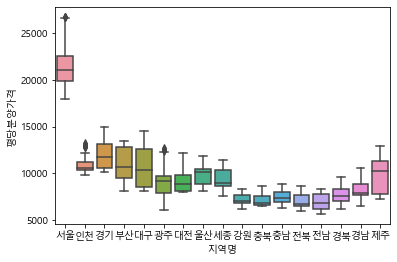

In [162]:
sns.boxplot(data=df, x='지역명', y='평당분양가격')